
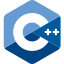
<br>

<div style="text-align:center; font-size:200%;">
  <b>Concrete Factory and Builder</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 12 Concrete Factory and Builder.ipynb -->
<!-- slides/module_500_solid_grasp/topic_270_adventure_factory.cpp -->


### Adventure Game Version 3b

- Assignment of functionality to `World` and `Location` makes sense
- We see that `World` is in danger of having too many "reasons to change"
  - Changes to the implementation of the game world
  - Changes to the initialization data (e.g. XML instead of JSON)
- Can we avoid this?


# Concrete Factory (Simple Factory)

- Simpler version of the Abstract Factory Pattern from the GoF book

### Question

- Who should create an object if there are circumstances that speak against
  creators?
  - complex logic for creation
  - cohesion
  - Many parameters necessary for creation

### Answer

- A class that is only responsible for creating objects
- These classes are often referred to as *Factory*


- Factories are examples of the GRASP pattern "Pure Fabrication"
- They can increase the cohesion of classes and reduce their complexity
- But they also increase the overall complexity of the system


## Example

- In version 3b, the constructor of `World` is relatively complex
- We can outsource the creation to a factory
- See `code/adventure/v3c`


## C++: Named Parameters

The C++ idiom "Named Parameters" is a variant of the Factory Pattern.

- C++ does not support named arguments
- Sometimes it is difficult to avoid functions with many parameters
  - Especially when constructing objects
- Even if we use default values, we have to specify many of the parameters
  - All parameters before the one we want to change
- It is difficult to keep track of what parameters mean
  - Modern IDEs simplify this
- How can we make functions with many parameters clear?


# Named Parameters / Builder Pattern

### Question

- How can we write functions that take many parameters and remain easy to understand?
- How can we construct complex objects?

### Answer

- Helper class that stores the parameters
- Methods that set individual parameters
  - Each of these methods returns `*this` as reference
- A `build()` or `execute()` method

In [ ]:
#include <iostream>

In [ ]:
class Window {
public:
    Window(int width, int height, int x, int y,
           bool visible, bool active, bool resizable,
           bool fullscreen) {
        std::cout << "Building window with width=" << width
                  << ", height=" << height << ", x=" << x << ", y=" << y
                  << ", visible=" << visible << ", active=" << active
                  << ", resizable=" << resizable
                  << ", fullscreen=" << fullscreen << "\n";
    }
};

In [ ]:
class WindowBuilder {
public:
    WindowBuilder() = default;

    Window build() {
        return Window(this->width_, this->height_, this->x_,
                      this->y_, this->visible_, this->active_,
                      this->resizable_, this->fullscreen_);
    }

    WindowBuilder& width(int width) {
        this->width_ = width;
        return *this;
    }
    WindowBuilder& height(int height) {
        this->height_ = height;
        return *this;
    }
    WindowBuilder& x(int x) {
        this->x_ = x;
        return *this;
    }
    WindowBuilder& y(int y) {
        this->y_ = y;
        return *this;
    }
    WindowBuilder& visible(bool visible) {
        this->visible_ = visible;
        return *this;
    }
    WindowBuilder& active(bool active) {
        this->active_ = active;
        return *this;
    }
    WindowBuilder& resizable(bool resizable) {
        this->resizable_ = resizable;
        return *this;
    }
    WindowBuilder& fullscreen(bool fullscreen) {
        this->fullscreen_ = fullscreen;
        return *this;
    }


private:
    int width_ = 800;
    int height_ = 600;
    int x_ = 0;
    int y_ = 0;
    bool visible_ = true;
    bool active_ = true;
    bool resizable_ = true;
    bool fullscreen_ = false;
};


- The member functions of `WindowBuilder` can be declared as `constexpr`
- This also allows the creation of objects at compile time
- [Compiler-Explorer](https://godbolt.org/z/848n6rEfE)


## Workshop: Implementing an Email Builder

In this workshop, you will create a builder for the following `Email` class.
This class represents an email message with various fields such as sender,
recipient, subject, and body:

In [ ]:
class Email {
private:
    std::string sender_;
    std::vector<std::string> recipients_;
    std::vector<std::string> cc_;
    std::vector<std::string> bcc_;
    std::string subject_;
    std::string body_;
    bool isHtml_;
    int priority_;

public:
    Email(const std::string& sender,
          const std::vector<std::string>& recipients,
          const std::vector<std::string>& cc,
          const std::vector<std::string>& bcc,
          const std::string& subject,
          const std::string& body,
          bool isHtml,
          int priority)
        : sender_{sender}, recipients_{recipients}, cc_{cc}, bcc_{bcc},
          subject_{subject}, body_{body}, isHtml_{isHtml}, priority_{priority} {}

    std::string getSender() const { return sender_; }
    std::vector<std::string> getRecipients() const { return recipients_; }
    std::vector<std::string> getCc() const { return cc_; }
    std::vector<std::string> getBcc() const { return bcc_; }
    std::string getSubject() const { return subject_; }
    std::string getBody() const { return body_; }
    bool getIsHtml() const { return isHtml_; }
    int getPriority() const { return priority_; }
};

In [ ]:
#include <iostream>
#include <sstream>

In [ ]:
namespace std {
ostream& operator<<(std::ostream& os, const Email& email) {
    os << "Email Details:\n"
       << "From: " << email.getSender() << "\n"
       << "To: ";

    for (const auto& recipient : email.getRecipients()) {
        os << recipient << "; ";
    }
    os << "\n";

    if (!email.getCc().empty()) {
        os << "CC: ";
        for (const auto& cc : email.getCc()) {
            os << cc << "; ";
        }
        os << "\n";
    }

    if (!email.getBcc().empty()) {
        os << "BCC: ";
        for (const auto& bcc : email.getBcc()) {
            os << bcc << "; ";
        }
        os << "\n";
    }

    os << "Subject: " << email.getSubject() << "\n"
       << "Body: " << email.getBody() << "\n"
       << "HTML: " << (email.getIsHtml() ? "Yes" : "No") << "\n"
       << "Priority: " << email.getPriority() << "\n";

    return os;
}
}  // namespace std


### Objective

Implement an `EmailBuilder` class that allows for a more flexible and
readable way to create `Email` objects.


### Tasks

1. Review the provided `Email` class.
2. Create an `EmailBuilder` class with methods for setting each field of the
   `Email` class.
3. Implement a `build()` method in the `EmailBuilder` class that returns a
   fully constructed `Email` object.
4. Ensure that the `EmailBuilder` supports method chaining for a fluent
   interface.
5. Call your `EmailBuilder` and use it to create an `Email` object.

You should be able to create an `Email` object using the `EmailBuilder` like
this:

```cpp
Email email = EmailBuilder()
    .from("sender@example.com")
    .to("recipient@example.com")
    .subject("Meeting Tomorrow")
    .body("Let's meet at 2 PM.")
    .build();
```